In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme(rc={
    "figure.figsize": (16, 9)
})

In [41]:
df = pd.read_csv("kw_2024_11_03_22_52.csv")

In [42]:
df.head()

,full_name,text_body,author_name,votes,responds_to,parent_submission_name,submission_flair,created_timestamp,parsed_timestamp,controversiality
0,t3_x1log3,Police Riot Control Unit (Credits: Thilina Kal...,t2_j86kk,138,NaN,t3_x1log3,NaN,1.661872e+09,1730648820,False
1,t1_imgioxb,"At the end, they will all come out of the wood...",t2_8r2urza4,26,t3_x1log3,t3_x1log3,NaN,1.661872e+09,1730648820,False
2,t1_imfb9ot,How many exp points for winning the boss battle?,t2_fqpxmcur,15,t3_x1log3,t3_x1log3,NaN,1.661872e+09,1730648820,False
3,t1_imecoc8,Looks pretty badass putha,t2_ex2g3j3,30,t3_x1log3,t3_x1log3,NaN,1.661872e+09,1730648820,False
4,t1_imferb3,"So, this is how this democracy looks that ever...",t2_g307d,16,t3_x1log3,t3_x1log3,NaN,1.661872e+09,1730648820,False


### Описание столбцов
1. *full_name* - Идентификатор текстовой записи (публикация или комментарий). Тип: строка.
2. *text_body* - Текстовое содержание записи, кодированное в UTF-8. Может содержать несвязный текст или текст на языке, отличном от английского. Может содержать пропуски (автор удалил аккаунт или комментарий). Тип: строка.
3. *author_name* - Идентификатор автора текстовой записи. Может содержать пропуски (автор удалил аккаунт). Тип: строка.
4. *votes* - Рейтинг записи. Тип: число.
5. *responds_to* - Идентификатор записи, на которую отвечает данная. Может содержать пропуски (запись является корневой публикацией). Тип: строка.
6. *parent_submission_name* - Идентификатор публикации, в дереве которой находится данная запись. Может содержать пропуски (запись является корневой публикацией). Тип: строка.
7. *submission_flair* - Категория текстовой записи. Единая для всего дерева публикации. Тип: строка
8. *created_timestamp* - UNIX метка времени создания записи по данным Reddit. Тип: число
9. *parsed_timestamp* - UNIX метка времени сохранения записи парсером. Тип: число
10. *controversiality* - Отметка о спорности публикации по данным Reddit. Тип: булев

In [43]:
print(f"Row count: {df.shape[0]}")

print(f"Unique rows: {df["full_name"].nunique()}")
print(f"Unique authors (including null value): {df["author_name"].nunique()}")
print(f"Unique submissions (not comments): {df["parent_submission_name"].nunique()}")

Row count: 10109
Unique rows: 9511
Unique authors (including null value): 2279
Unique submissions (not comments): 568


In [44]:
df["submission_flair"].value_counts()

submission_flair
Discussion                 10
News                        8
Translation in comments     6
Sports                      1
Name: count, dtype: int64

### Признак controversiality 

In [45]:
df["controversiality"].value_counts()

controversiality
False    9890
True      219
Name: count, dtype: int64

In [46]:
df.groupby(["submission_flair", "controversiality"]).size()

submission_flair         controversiality
Discussion               False               10
News                     False                8
Sports                   False                1
Translation in comments  False                6
dtype: int64

In [47]:
def build_replies_up(df: pd.DataFrame, starting_node: pd.DataFrame) -> list[str]:
    out = [starting_node["text_body"]]
    next_parent = starting_node["responds_to"]

    while isinstance(next_parent, str):
        node = df[df["full_name"] == next_parent]
        out.append(node.iloc[0]['text_body'])
        next_parent = node.iloc[0]['responds_to']

    return list(reversed(out))

In [48]:
def print_replies(start_id: int) -> None:
    for i in build_replies_up(df, df.iloc[start_id]):
        print(i)
        print("="*20)

### Признак votes

In [49]:
df["votes"].describe()

count    10109.000000
mean         6.373034
std         24.210351
min        -54.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1271.000000
Name: votes, dtype: float64

<Axes: xlabel='votes', ylabel='Count'>

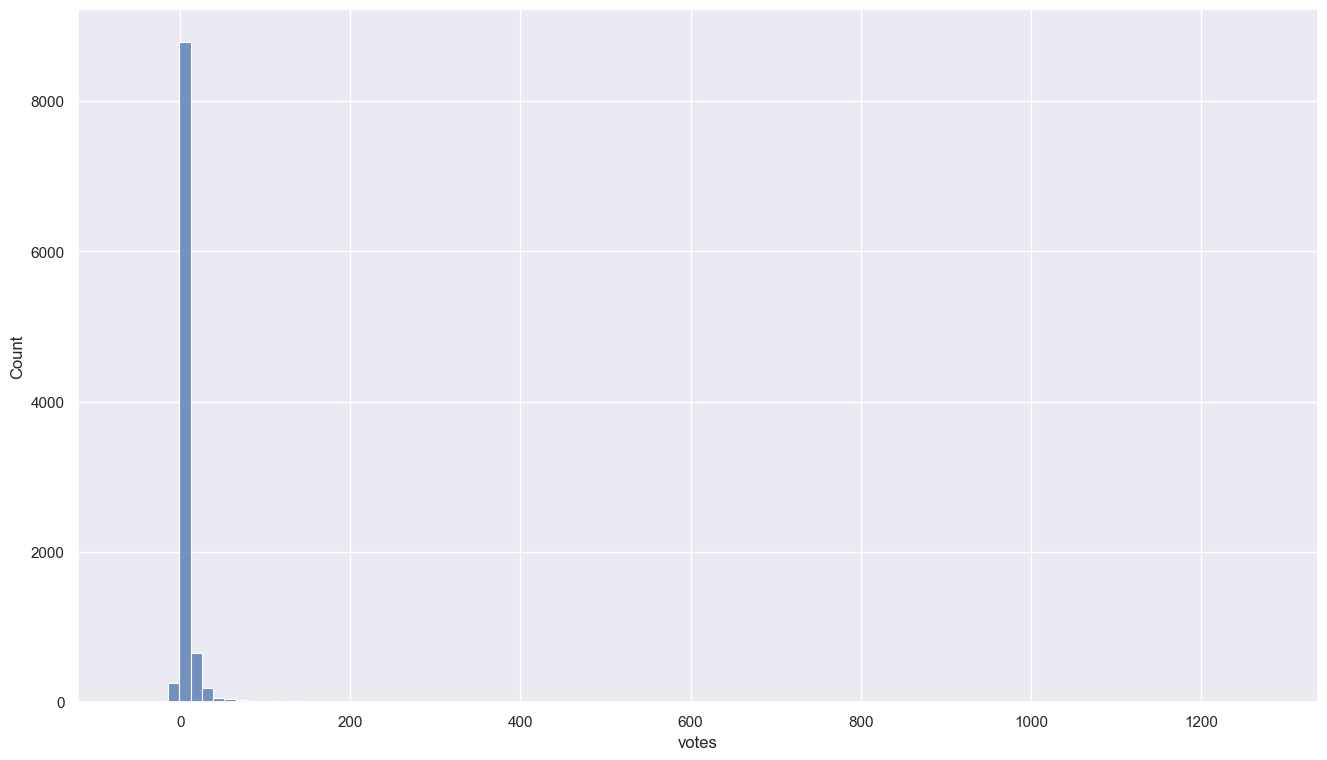

In [50]:
sns.histplot(data=df, x="votes", bins=100)

[(0.0, 100.0)]

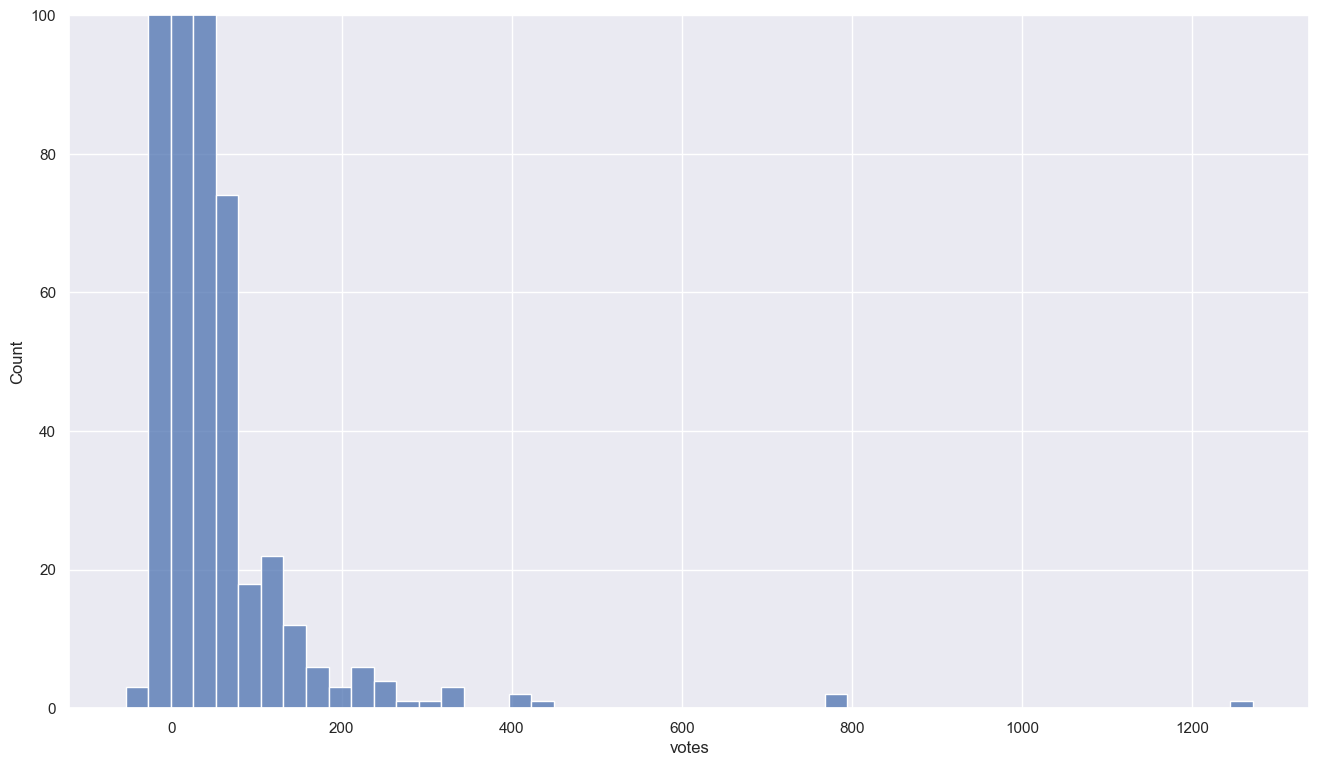

In [51]:
ax = sns.histplot(data=df, x="votes", bins=50)
ax.set(ylim=(0, 100))

In [52]:
print(f"99th quantile of votes: {df["votes"].quantile(0.99)}")

99th quantile of votes: 67.92000000000007


In [54]:
df.groupby("submission_flair")["votes"].describe()

,count,mean,std,min,25%,50%,75%,max
submission_flair,,,,,,,,
Discussion,10.0,3.800,3.489667,1.0,1.25,2.5,4.50,10.0
News,8.0,4.625,3.067689,1.0,2.00,4.0,7.25,9.0
Sports,1.0,17.000,NaN,17.0,17.00,17.0,17.00,17.0
Translation in comments,6.0,12.500,14.896308,1.0,2.25,7.5,15.75,40.0


In [55]:
df.groupby(["submission_flair", "controversiality"])["votes"].mean()

submission_flair         controversiality
Discussion               False                3.800
News                     False                4.625
Sports                   False               17.000
Translation in comments  False               12.500
Name: votes, dtype: float64

In [56]:
df.groupby(["submission_flair", "controversiality"])["votes"].median()

submission_flair         controversiality
Discussion               False                2.5
News                     False                4.0
Sports                   False               17.0
Translation in comments  False                7.5
Name: votes, dtype: float64

In [57]:
df.groupby(["submission_flair", "controversiality"])["votes"].max()

submission_flair         controversiality
Discussion               False               10
News                     False                9
Sports                   False               17
Translation in comments  False               40
Name: votes, dtype: int64

In [58]:
print(f"90th quantile of votes: {df["votes"].quantile(0.90)}")

90th quantile of votes: 13.0


### Признак created_timestamp

In [59]:
from datetime import datetime

In [60]:
df["created_datetime"] = df["created_timestamp"].apply(
    lambda x: datetime.fromtimestamp(x)
)

In [61]:
df["created_datetime"].min()

Timestamp('2012-12-10 01:16:28')

In [62]:
df["created_datetime"].max()

Timestamp('2023-06-10 11:42:20')

In [63]:
df["year"] = df["created_datetime"].apply(
    lambda x: x.year
)

In [64]:
df.groupby("year")["votes"].size()

year
2012       5
2013      10
2014       9
2015      18
2016       2
2017      82
2018     182
2019     454
2020     916
2021    1951
2022    5535
2023     945
Name: votes, dtype: int64

In [65]:
df.groupby(["year", "submission_flair"])["votes"].size()

year  submission_flair       
2022  Discussion                 10
      News                        8
      Sports                      1
      Translation in comments     6
Name: votes, dtype: int64

In [66]:
df.groupby(["year", "controversiality"])["votes"].size()

year  controversiality
2012  False                  5
2013  False                 10
2014  False                  9
2015  False                 18
2016  False                  2
2017  False                 82
2018  False                180
      True                   2
2019  False                423
      True                  31
2020  False                885
      True                  31
2021  False               1922
      True                  29
2022  False               5421
      True                 114
2023  False                933
      True                  12
Name: votes, dtype: int64

In [69]:
df.groupby("year")["votes"].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2012,5.0,2.000000,1.224745,1.0,1.00,2.0,2.00,4.0
2013,10.0,2.700000,2.907844,1.0,1.00,1.0,2.75,9.0
2014,9.0,2.888889,2.420973,0.0,1.00,3.0,3.00,8.0
2015,18.0,2.833333,2.727852,1.0,1.00,2.0,2.00,10.0
2016,2.0,5.500000,0.707107,5.0,5.25,5.5,5.75,6.0
2017,82.0,3.195122,3.297732,1.0,1.00,2.0,3.00,20.0
2018,182.0,2.593407,2.720814,-1.0,1.00,2.0,3.00,18.0
2019,454.0,4.013216,7.499216,-12.0,1.00,2.0,5.00,111.0
2020,916.0,4.947598,10.686158,-23.0,1.00,2.0,5.00,123.0
